In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("9-loan_risk_svm.csv")
print(df.columns)
print(df.shape)
print(df.info())
print(df.isnull().sum())

Index(['credit_score_fluctuation', 'recent_transaction_volume', 'loan_risk'], dtype='object')
(1000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score_fluctuation   1000 non-null   float64
 1   recent_transaction_volume  1000 non-null   float64
 2   loan_risk                  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
None
credit_score_fluctuation     0
recent_transaction_volume    0
loan_risk                    0
dtype: int64


In [3]:
df.head()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
0,-1.439860,1.283010,1
1,-0.276571,-1.232382,0
2,1.312047,0.955097,1
3,1.020706,0.089485,0
4,1.513729,0.580520,1


In [4]:
# Elimizde Scale edilmiş, boş veri bulunmayan ve her kolonu sayısal olan bir dataset var.
# Bu datasette SVC ile sınıflandırma yapmayı deneyeceğiz ama bu bir önceki notebook'taki kadar belli bir dataset değil.
# Biraz daha zor ve ayrılışı çok belli olmayan bir datasetimiz var.
# Şimdi Scatterplot'umuzu inceleyelim.

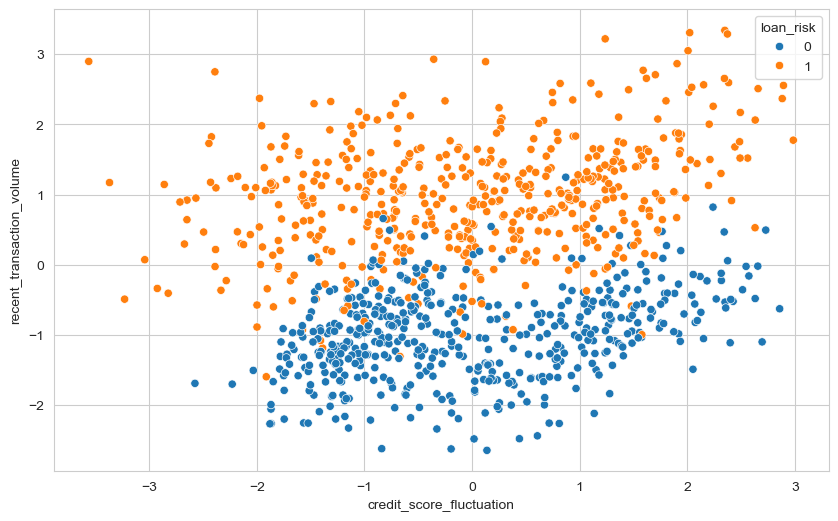

In [5]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.scatterplot(x="credit_score_fluctuation", y="recent_transaction_volume", hue="loan_risk", data=df)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop("loan_risk", axis=1)
y = df["loan_risk"]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=15)

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
linear = SVC(kernel="linear")
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("Classification Report: \n", classification_report(y_pred, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))

Accuracy:  0.916
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       118
           1       0.93      0.91      0.92       132

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

Confusion Matrix: 
 [[109   9]
 [ 12 120]]


In [8]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train, y_train)
y_pred1 = rbf.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred1, y_test))
print("Classification Report: \n", classification_report(y_pred1, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_pred1, y_test))

Accuracy:  0.924
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       124
           1       0.91      0.94      0.93       126

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

Confusion Matrix: 
 [[113  11]
 [  8 118]]


In [9]:
poly = SVC(kernel="poly")
poly.fit(X_train, y_train)
y_pred2 = poly.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred2, y_test))
print("Classification Report: \n", classification_report(y_pred2, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_pred2, y_test))

Accuracy:  0.912
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       115
           1       0.94      0.90      0.92       135

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

Confusion Matrix: 
 [[107   8]
 [ 14 121]]


In [10]:
sigmoid = SVC(kernel="sigmoid")
sigmoid.fit(X_train, y_train)
y_pred3 = sigmoid.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred3, y_test))
print("Classification Report: \n", classification_report(y_pred3, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_pred3, y_test))

Accuracy:  0.828
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       118
           1       0.84      0.83      0.84       132

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

Confusion Matrix: 
 [[ 98  20]
 [ 23 109]]


In [11]:
# 4 tane SVC modeli eğittik ve hepsinin sonuçlarını inceledik.
# Değiştirdiğimiz şeyler ise kernel'lar. Diğer her şey aynı.
# Ve en iyi sonuç veren 0.92'lik doğruluk ve en fazla doğru tahmin ile rbf kernel'ı olan SVC modelidir.
# Bu dataset önceki email datasetine göre daha zor olsa da yine de çok gerçekçi ve zorlayıcı bir problem değildir.

## Hyperparameter Tuning

In [12]:
params = {
    "C": [0.1, 1, 10, 100, 1000],
    "kernel": ["linear", "rbf"],
    "gamma": ["auto", "scale"]
}

In [13]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=SVC(), param_grid=params, n_jobs=-1, scoring="accuracy", cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [14]:
y_pred4 = grid.predict(X_test) 
print("Accuracy: ", accuracy_score(y_pred4, y_test)) 
print("Classification Report: \n", classification_report(y_pred4, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_pred4, y_test))

Accuracy:  0.924
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       122
           1       0.92      0.93      0.93       128

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

Confusion Matrix: 
 [[112  10]
 [  9 119]]


In [15]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=10)


In [16]:
# SVC ile lojistik regresyonda olduğu gibi GridSearchCV ve RandomizedSearchCV ile hiperparametre ayarlaması yapabiliyoruz.
# Bu parametreleri elle ayarlayarak ve denemeler yaparak modelin en iyi hangi parametrelerde sonuç verdiğini inceleyebiliyoruz.
# Bu işlem modelin performansını arttırmak ve farklı datasetlere uyum sağlamak açısından çok önemli ve değerlidir.
# Parametre olarak C değerlerini,  kernel'ları ve gamma'yı ayarlayabiliyoruz.
# Kernel ve C değerlerini zaten daha önce konuşmuştuk.
# gamma değeri de modelin parametresi olarak ayarlayabileceğimiz değerleri temsil eder ve auto ve scale olmak üzere iki değeri vardır.